In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [195]:
df = pd.read_csv('train.csv')

In [196]:
df.shape

(1460, 81)

In [197]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot: >

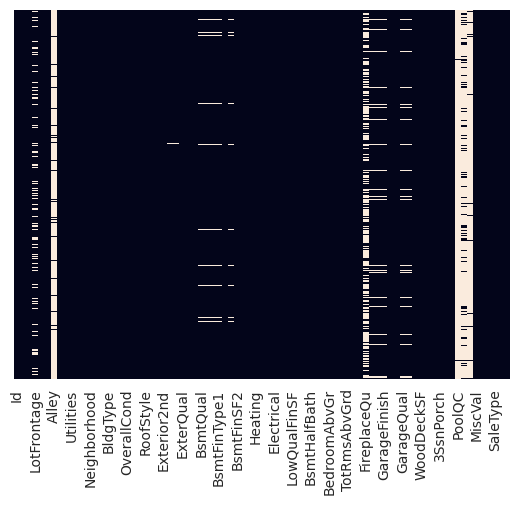

In [199]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [200]:
df.shape

(1460, 81)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [202]:
# Filling Missing Values

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df.drop(['Alley'], axis=1, inplace=True)
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

df.drop(['GarageYrBlt'], axis=1, inplace=True)

df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df.drop(['Id'], axis=1, inplace=True)

In [203]:
df.dropna(inplace=True)

<AxesSubplot: >

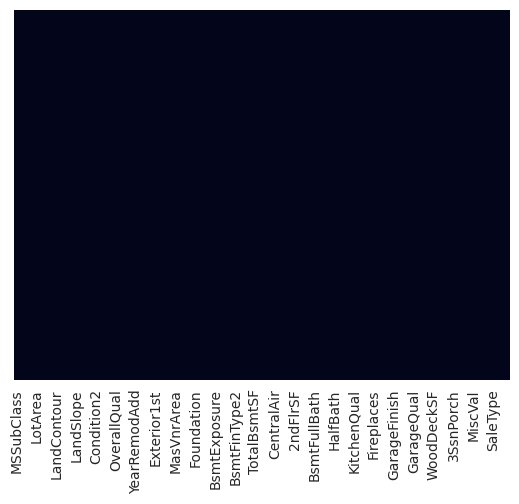

In [204]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [205]:
df.shape

(1422, 75)

In [206]:
## Handle Test Data

test_df = pd.read_csv('test.csv')

In [207]:
test_df.shape

(1459, 80)

In [208]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [209]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [210]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())

test_df.drop(['Alley'], axis=1, inplace=True)

test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])

test_df.drop(['GarageYrBlt'], axis=1, inplace=True)

test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

test_df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

test_df['MasVnrType']= test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']= test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])

test_df['BsmtFinType2']= test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].median())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].median())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].median())
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

test_df_id = test_df['Id']

test_df.drop(['Id'], axis=1, inplace=True)


In [211]:
test_df.shape

(1459, 74)

In [212]:
## Handle Categorical Features
# Select categorical features
columns = list(df.select_dtypes(include='object'))
len(columns)

39

In [213]:
def category_onehot_multi_columns(multi_columns):
    df_final = final_df
    i = 0

    for field in multi_columns:
        print(field)

        df1 = pd.get_dummies(final_df[field], drop_first=True)
        
        final_df.drop([field], axis=1, inplace=True)

        if i == 0:
            df_final = df1.copy()

        else:
            df_final = pd.concat([df_final, df1], axis=1)

        i += 1
       
    df_final = pd.concat([final_df, df_final], axis=1)
        
    return df_final


In [214]:
final_df = pd.concat([df, test_df], axis=0)

In [215]:
final_df = category_onehot_multi_columns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [216]:
final_df.shape

(2881, 235)

In [217]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [218]:
final_df.shape

(2881, 175)

In [219]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [220]:
df_train = final_df.iloc[:1422, :]
df_test = final_df.iloc[1422:, :]

In [221]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [222]:
df_test.shape

(1459, 175)

In [223]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

/tmp/ipykernel_50031/2086669381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis=1, inplace=True)


In [224]:
columns = list(df_test.columns)

In [225]:
X = df_train.drop(['SalePrice'], axis=1)
Y = df_train['SalePrice']

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [227]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [228]:
# predicting y for test dataset

Y_pred = regressor.predict(X_test)

print(Y_pred)

[190391.66403534 169363.440954   449040.80595652 233477.06898727
 122853.0842288  178002.92800313 130134.33346246 165399.59292588
 204611.0367306  134117.9137733  155102.13741438 124193.9935069
 146992.52054614 295781.10137255 218205.25273033 209507.70317986
 313947.34990214 127722.25424018 220501.90475276 215756.71557467
 152659.14314859 103185.2007681   85576.50764839 245882.77014224
 233465.36582749 207097.48712362 189724.40756109 208632.89455422
 223049.04545037 314201.81575021 184133.44314064 125153.47599716
 183798.50241229 187695.91109499 182353.36532703 321686.6238528
 397395.28066667 632851.7256806  125378.44604055  81391.12844358
 135994.93820566 176632.10197196 193079.24391289 105975.32162191
 299096.68126921 189923.32730654 150253.66568249 268682.06403657
 123592.19702842 197626.76861253  94281.32737229 300450.87167329
 139906.14201345 334228.23614781 192662.90439041 202644.88117273
 110215.76163194 163716.93384701  97091.81454795 183561.32360858
 288565.02333138 187961.143

In [229]:
# comparing result

y_test = np.asarray(Y_test)
y_pred = np.asarray(Y_pred)
compare_result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(compare_result)

       Actual      Predicted
0    194000.0  190391.664035
1    168000.0  169363.440954
2    466500.0  449040.805957
3    295493.0  233477.068987
4    130000.0  122853.084229
..        ...            ...
280  142000.0  137820.455473
281   52500.0   61718.607154
282  213250.0  185202.701886
283  360000.0  337692.105679
284  100000.0   91004.308611

[285 rows x 2 columns]


In [230]:
print('MAE: ', metrics.mean_absolute_error(compare_result.Actual, compare_result.Predicted) )
print('MSE: ', metrics.mean_squared_error(compare_result.Actual, compare_result.Predicted) )
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(compare_result.Actual, compare_result.Predicted)))
print('R-squared: ', metrics.r2_score(compare_result.Actual, compare_result.Predicted))

MAE:  20849.013217619155
MSE:  3366240601.0971656
RMSE:  144.39187379357315
R-squared:  0.3984590376040895


<AxesSubplot: >

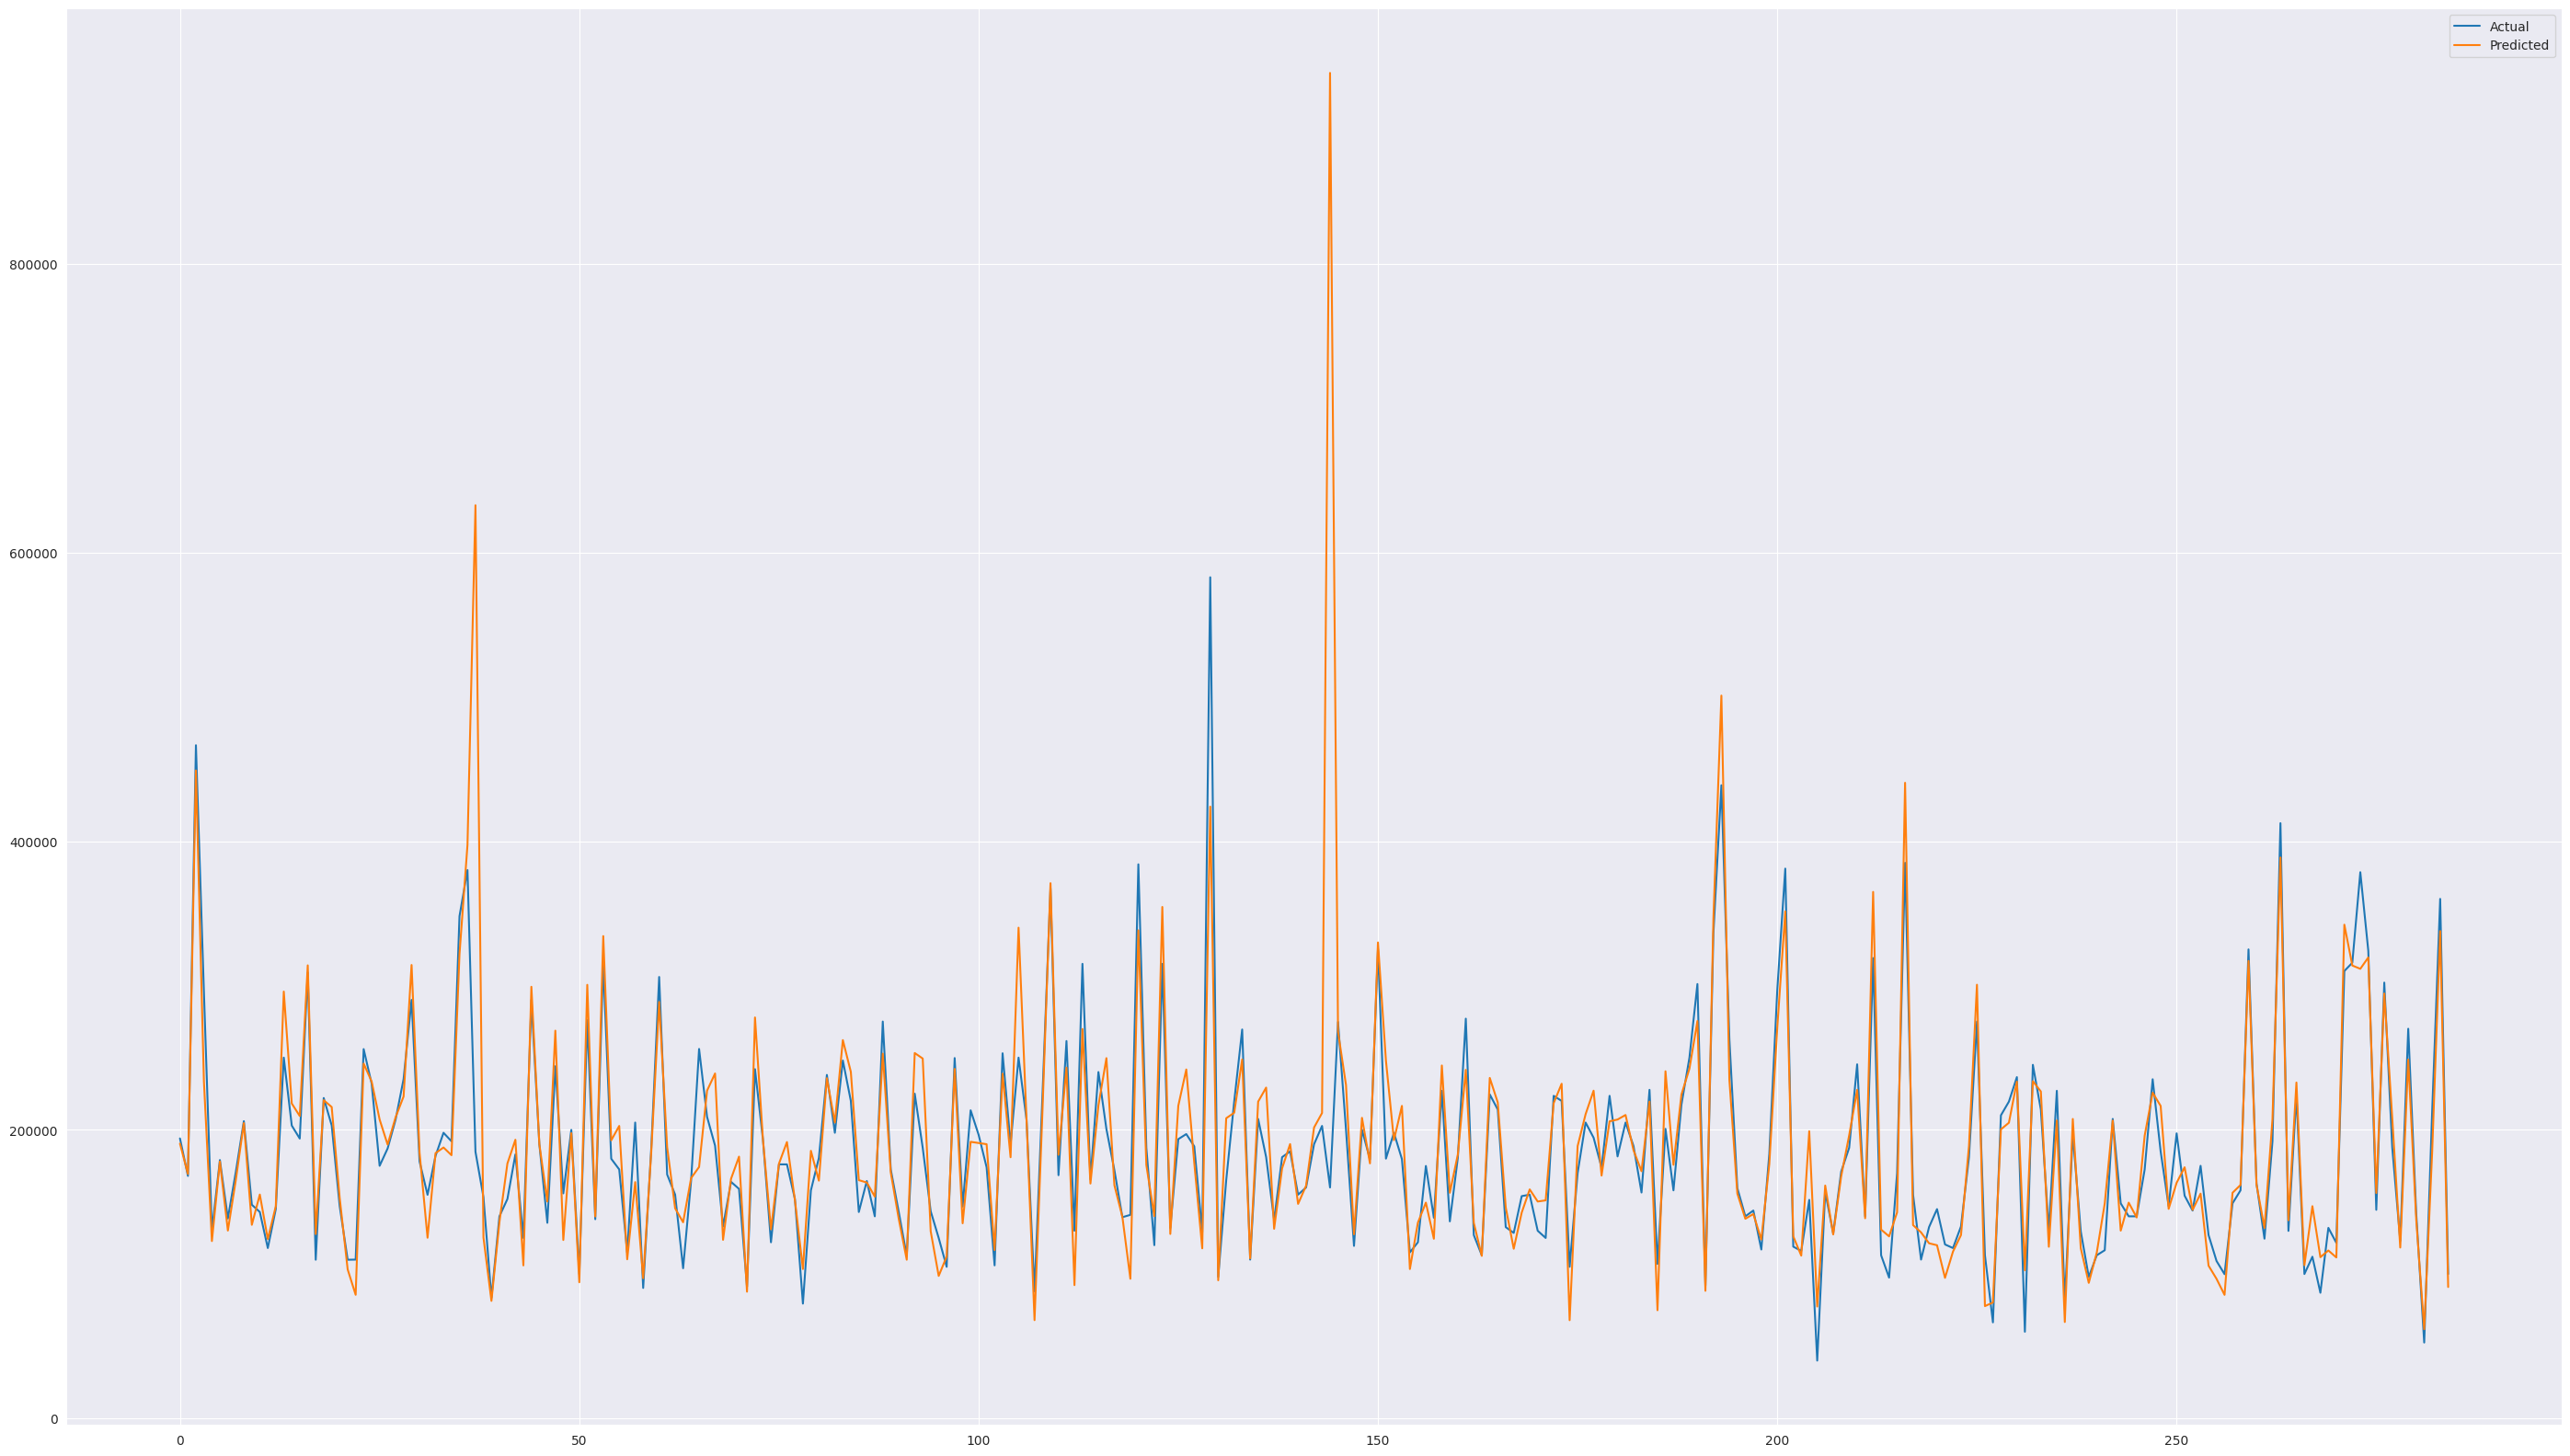

In [231]:
compare_result.plot(kind='line', figsize=(35, 20))
# compare_result.plot(kind='line')

In [232]:
Y_df_test_pred = regressor.predict(df_test)

print(Y_df_test_pred)

[105744.96406729 157134.18303577 186753.29583918 ... 178066.00793659
 104977.91164821 233899.48800357]


In [233]:
df_result = pd.DataFrame(
    {
        'Id': test_df_id,
        'SalePrice': Y_df_test_pred
    }
)

In [234]:
df_result

,Id,SalePrice
0,1461,105744.964067
1,1462,157134.183036
2,1463,186753.295839
3,1464,189782.759481
4,1465,221587.332422
...,...,...
1454,2915,74915.629765
1455,2916,68677.573764
1456,2917,178066.007937
1457,2918,104977.911648


In [235]:
df_result.to_csv('linear_regression_result.csv', index = False, encoding='utf-8')

In [236]:
rnd = RandomForestRegressor(n_estimators=1000)

rnd.fit(X_train, Y_train)
Y_rnd_pred = rnd.predict(X_test)

In [237]:
Y_rnd_pred

array([194791.851     , 176170.906     , 416683.03      , 242598.081     ,
       162505.436     , 190378.154     , 138226.668     , 168499.883     ,
       191396.209     , 141924.565     , 162434.185     , 109431.638     ,
       136470.011     , 303972.359     , 226275.462     , 194374.749     ,
       302254.451     , 117850.341     , 230265.423     , 193126.421     ,
       134394.77966667, 112475.778     , 119828.132     , 276154.574     ,
       227007.203     , 177508.404     , 182502.859     , 190506.416     ,
       259839.934     , 316109.356     , 205926.371     , 119267.307     ,
       173765.355     , 205139.333     , 191000.842     , 316228.606     ,
       408560.844     , 614706.614     , 148982.61      ,  94719.344     ,
       137451.59      , 134044.918     , 174995.974     , 121674.174     ,
       289360.328     , 202820.36      , 134001.729     , 254241.553     ,
       140899.882     , 205759.057     ,  92919.605     , 331453.301     ,
       141699.382     , 3

In [238]:
# comparing result

y_test = np.asarray(Y_test)
y_rnd_pred = np.asarray(Y_rnd_pred)
compare_rnd_result = pd.DataFrame(
    {
        'Actual': y_test.flatten(),
        'Predicted': y_rnd_pred.flatten()
    }
)
print(compare_rnd_result)

       Actual   Predicted
0    194000.0  194791.851
1    168000.0  176170.906
2    466500.0  416683.030
3    295493.0  242598.081
4    130000.0  162505.436
..        ...         ...
280  142000.0  135303.420
281   52500.0   77086.230
282  213250.0  219296.791
283  360000.0  343570.782
284  100000.0  123194.833

[285 rows x 2 columns]


In [239]:
print('MAE: ', metrics.mean_absolute_error(compare_rnd_result.Actual, compare_rnd_result.Predicted) )
print('MSE: ', metrics.mean_squared_error(compare_rnd_result.Actual, compare_rnd_result.Predicted) )
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(compare_rnd_result.Actual, compare_rnd_result.Predicted)))
print('R-squared: ', metrics.r2_score(compare_rnd_result.Actual, compare_rnd_result.Predicted))

MAE:  20114.10130526316
MSE:  2016620623.485563
RMSE:  141.8241915374918
R-squared:  0.6396336286112273


<AxesSubplot: >

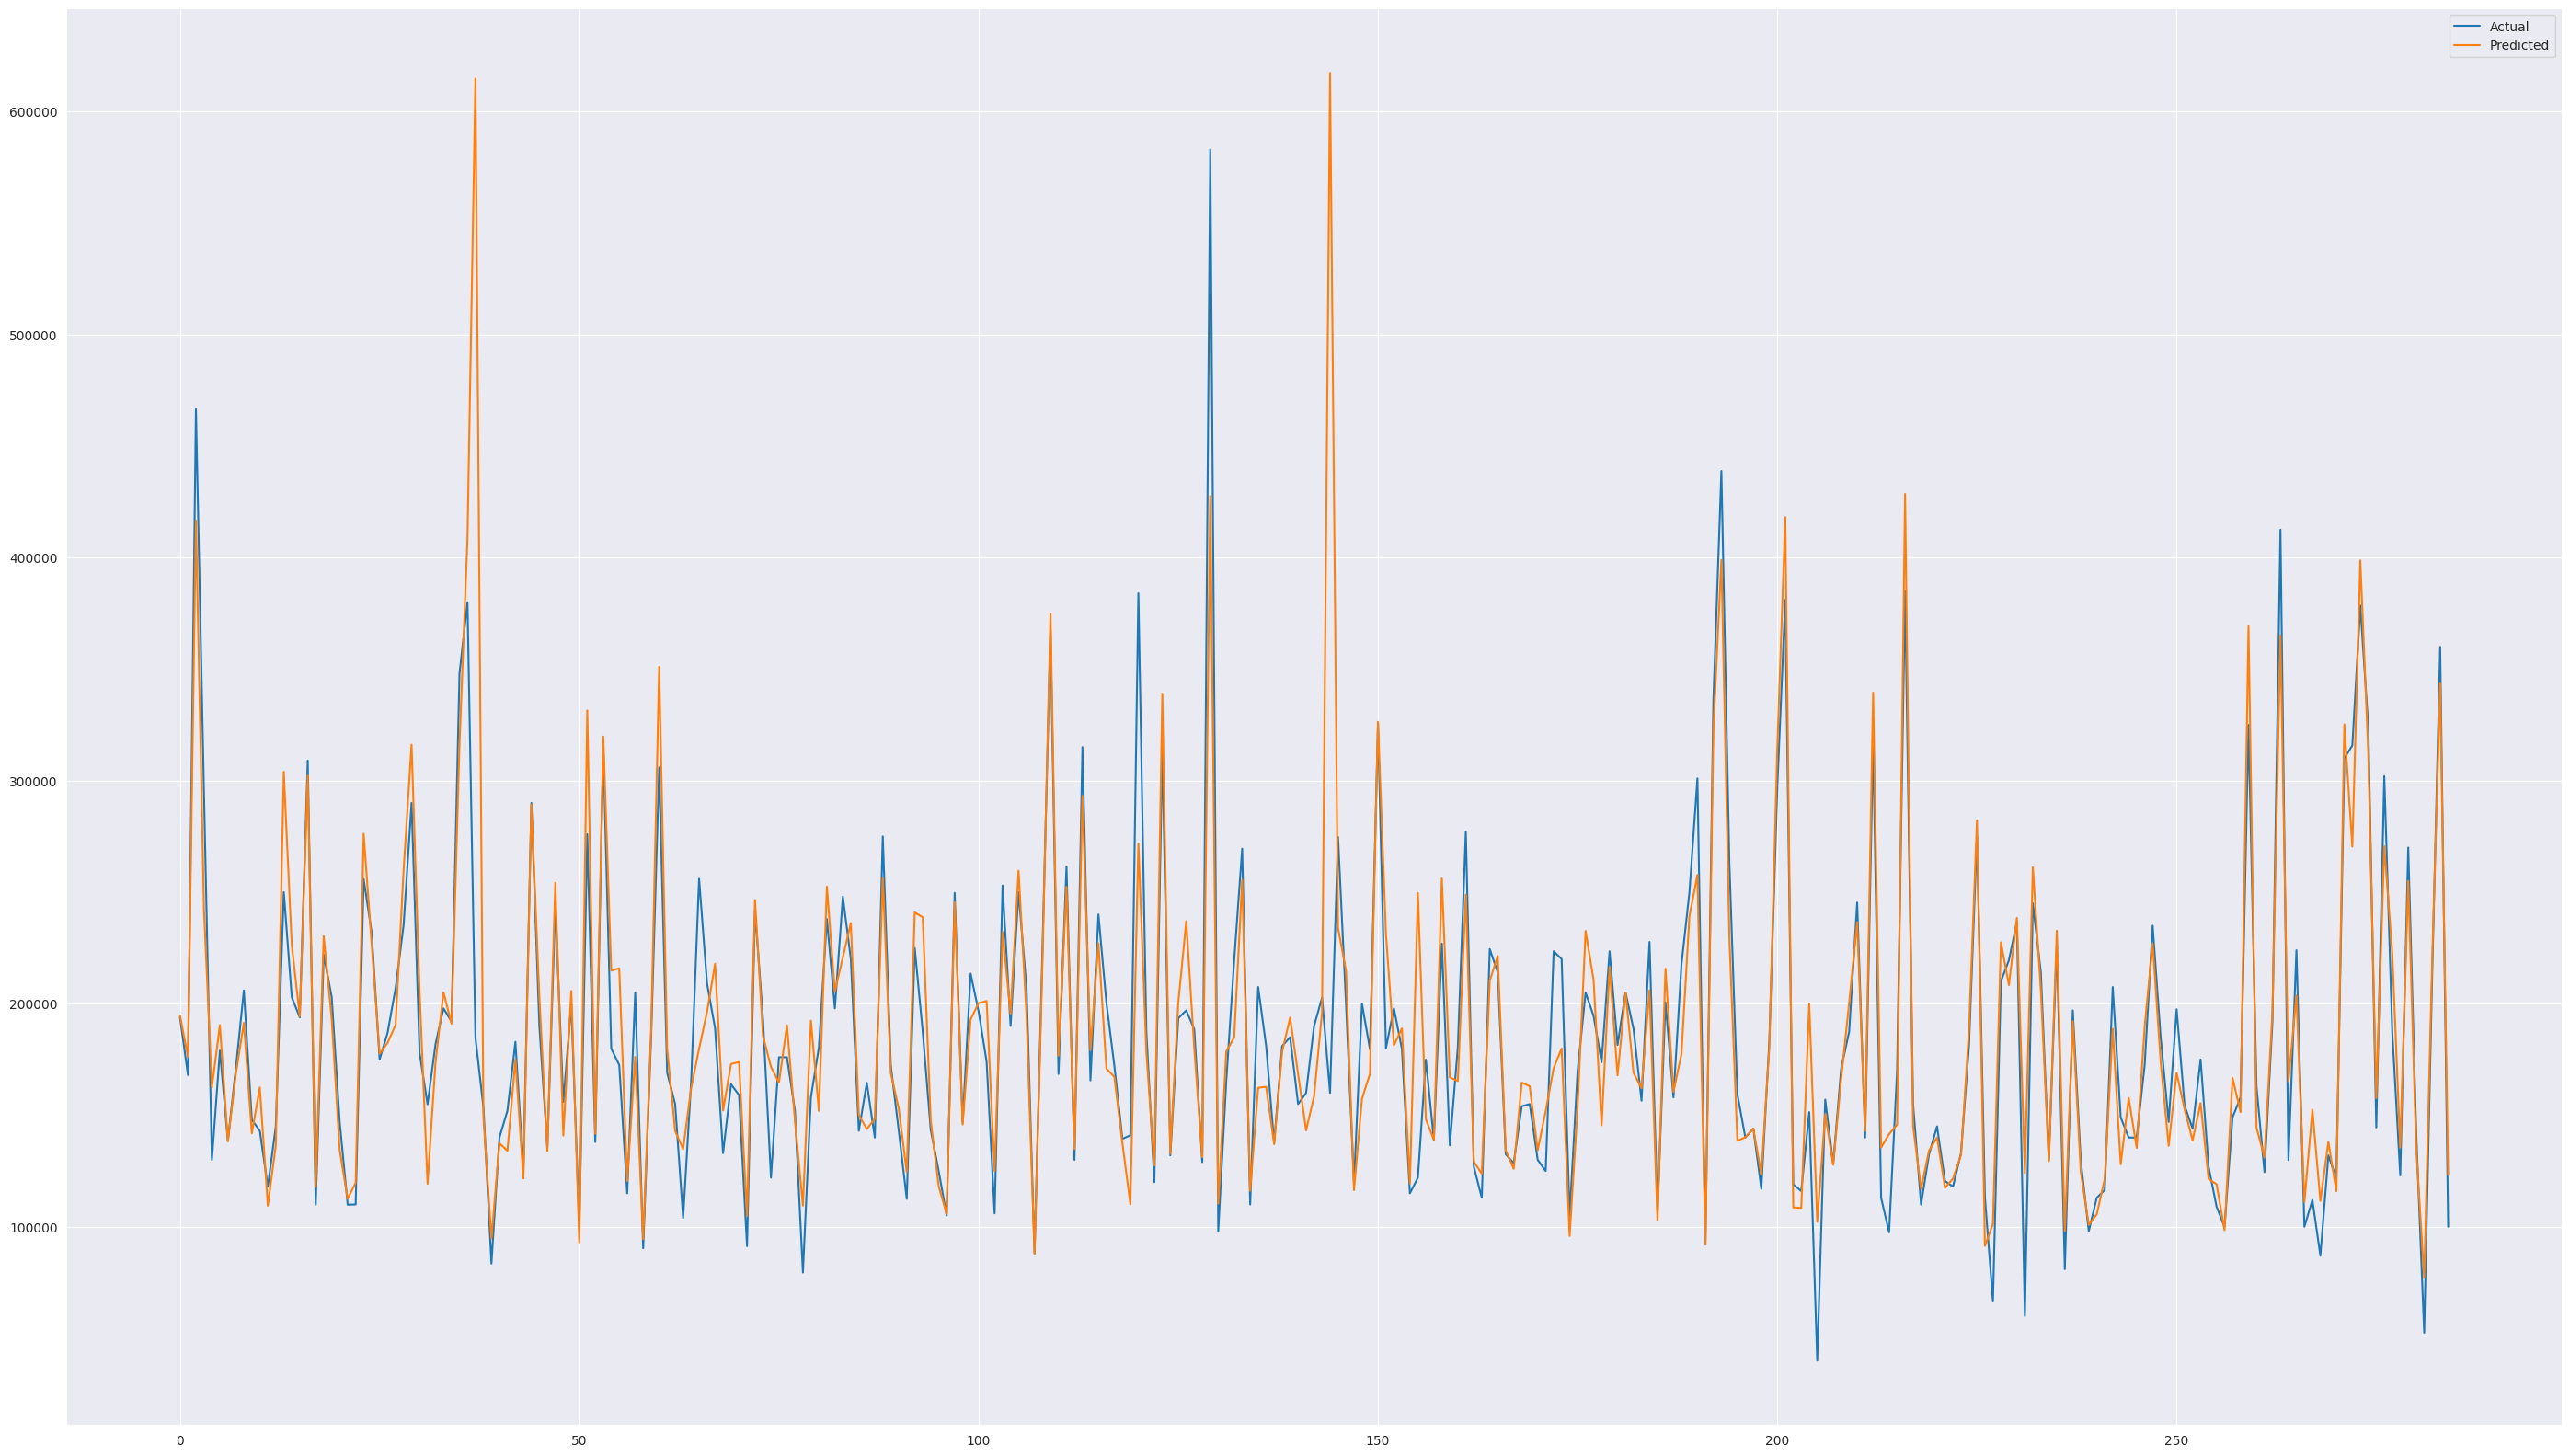

In [240]:
compare_rnd_result.plot(kind='line', figsize=(35, 20))

<AxesSubplot: >

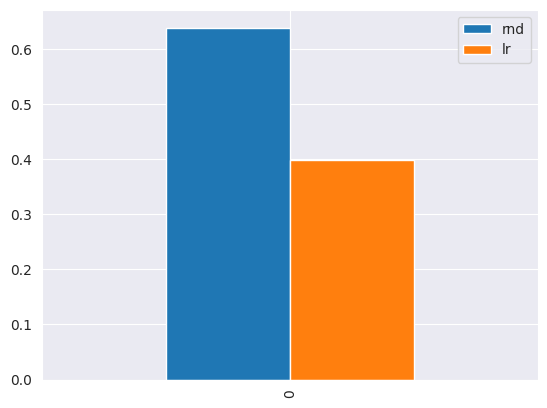

In [241]:
score_comparison = pd.DataFrame(
    {
        'rnd': [metrics.r2_score(compare_rnd_result.Actual, compare_rnd_result.Predicted)],
        'lr': [metrics.r2_score(compare_result.Actual, compare_result.Predicted)]
    }
)

score_comparison.plot.bar()

In [242]:
Y_df_test_rnd_pred = rnd.predict(df_test)

print(Y_df_test_rnd_pred)

[127982.063 153553.874 173857.697 ... 151923.945 117078.399 223697.251]


In [243]:
df_result = pd.DataFrame(
    {
        'Id': test_df_id,
        'SalePrice': Y_df_test_rnd_pred
    }
)

In [244]:
df_result.to_csv('random_forest_result.csv', index = False, encoding='utf-8')